In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# EDA Process


In [ ]:
# reading the data that is in csv format
df=pd.read_csv("/content/drive/MyDrive/Internship/Road.csv")

In [ ]:
df.head() # retuurn top 5 rows of dataset

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
# return last 5 rows of dataset
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
# returm random 5 rows of dataset
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
10447,7:30:00,Wednesday,Over 51,Male,High school,Employee,Below 1yr,Public (12 seats),Owner,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
1769,2:10:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Special vehicle,Owner,Unknown,...,Getting off,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
6491,17:11:00,Saturday,31-50,Male,Junior high school,Employee,Above 10yr,Public (13?45 seats),Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
7323,7:15:00,Wednesday,Unknown,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,NaN,...,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
2456,23:07:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Other,Owner,Above 10yr,...,Going straight,Pedestrian,Male,31-50,2,Self-employed,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
# return the dtypes of all column and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
# return all column
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
# return the dimesion of all datastet
df.shape

(12316, 32)

In [ ]:
# return summary stats of datatset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [ ]:
# return summary stats of dataset column having object dtypes
df.describe(include=object).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [ ]:
# using for loop to sell uniques values of object dtypes
for i in df.select_dtypes(include=object):
  uni=df[i].unique()
  print(uni)
  print()
  print("*"*50)

['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

**************************************************
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

**************************************************
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

**************************************************
['Male' 'Female' 'Unknown']

**************************************************
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

**************************************************
['Employee' 'Unknown' 'Owner' nan 'Other']

**************************************************
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']

**************************************************
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwa

In [ ]:
# to check is null values present in dataset
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
# using for loop to check the value count of dataset
for i in df.select_dtypes(include=object):
  uni=df[i].value_counts()
  print(uni)
  print()
  print("*"*50)

Time
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: count, Length: 1074, dtype: int64

**************************************************
Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64

**************************************************
Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

**************************************************
Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

**************************************************
Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illite

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
# filling the null values with Driver data
df['Work_of_casuality']=df['Work_of_casuality'].fillna("Driver")

In [ ]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
# filling the null values with Normal data
df["Fitness_of_casuality"]=df["Fitness_of_casuality"].fillna("Normal")

In [ ]:
# filling the null values with 2-5yrs data
df["Service_year_of_vehicle"]=df["Service_year_of_vehicle"].fillna("2-5yrs")

In [ ]:
# filling the null values with No defect
df["Defect_of_vehicle"]=df["Defect_of_vehicle"].fillna("No defect")

In [ ]:
df.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Service_year_of_vehicle          0
Defect_of_vehicle                0
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Work_of_casuality                0
Fitness_of_casuality

In [ ]:
# to drop the null values
df = df.dropna()

In [ ]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [ ]:
df.shape

(8439, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8439 entries, 1 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         8439 non-null   object
 1   Day_of_week                  8439 non-null   object
 2   Age_band_of_driver           8439 non-null   object
 3   Sex_of_driver                8439 non-null   object
 4   Educational_level            8439 non-null   object
 5   Vehicle_driver_relation      8439 non-null   object
 6   Driving_experience           8439 non-null   object
 7   Type_of_vehicle              8439 non-null   object
 8   Owner_of_vehicle             8439 non-null   object
 9   Service_year_of_vehicle      8439 non-null   object
 10  Defect_of_vehicle            8439 non-null   object
 11  Area_accident_occured        8439 non-null   object
 12  Lanes_or_Medians             8439 non-null   object
 13  Road_allignment              8439 non

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,8439.0,2.038038,0.680789,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,8439.0,1.547340,1.014755,1.0,1.0,1.0,2.0,8.0


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Time,8439,1030,17:10:00,77
Day_of_week,8439,7,Friday,1384
Age_band_of_driver,8439,5,18-30,2883
Sex_of_driver,8439,3,Male,7848
Educational_level,8439,7,Junior high school,5563
Vehicle_driver_relation,8439,4,Employee,7031
Driving_experience,8439,7,5-10yr,2412
Type_of_vehicle,8439,17,Automobile,2374
Owner_of_vehicle,8439,4,Owner,7428
Service_year_of_vehicle,8439,6,2-5yrs,3765


In [ ]:
for i in df.select_dtypes(include=object):
  value=df[i].value_counts()
  print(value)
  print()
  print("-"*50)

Time
17:10:00    77
15:30:00    75
16:00:00    73
17:00:00    73
18:00:00    73
            ..
21:42:00     1
1:37:00      1
11:17:00     1
23:39:00     1
21:27:00     1
Name: count, Length: 1030, dtype: int64

--------------------------------------------------
Day_of_week
Friday       1384
Thursday     1258
Wednesday    1258
Tuesday      1237
Saturday     1166
Monday       1156
Sunday        980
Name: count, dtype: int64

--------------------------------------------------
Age_band_of_driver
18-30       2883
31-50       2786
Unknown     1118
Over 51     1066
Under 18     586
Name: count, dtype: int64

--------------------------------------------------
Sex_of_driver
Male       7848
Female      468
Unknown     123
Name: count, dtype: int64

--------------------------------------------------
Educational_level
Junior high school    5563
Elementary school     1556
High school            826
Above high school      273
Writing & reading      130
Unknown                 59
Illiterate          

In [ ]:
# to remove the unnecessary space from column
df["Area_accident_occured"]=df["Area_accident_occured"].apply(lambda x:x.strip())

In [ ]:
# show the dtype
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

<Axes: xlabel='Accident_severity', ylabel='count'>

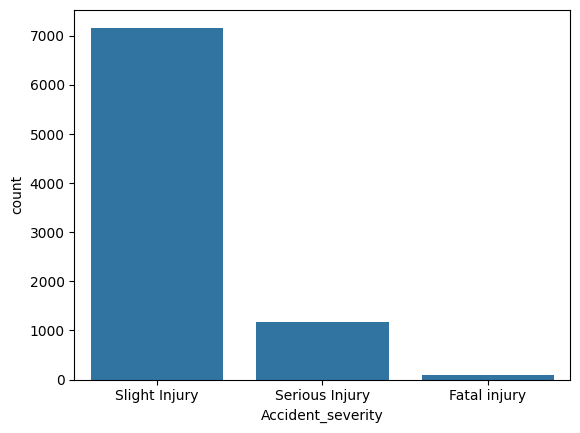

In [ ]:
# EDA process using seaborn library to check the data count in visualization
sns.countplot(x="Accident_severity",data=df)

In [ ]:
for i in df.select_dtypes(include=object):
  uni=df[i].value_counts()
  print(uni)
  print()
  print("-"*50)

Time
17:10:00    77
15:30:00    75
16:00:00    73
17:00:00    73
18:00:00    73
            ..
21:42:00     1
1:37:00      1
11:17:00     1
23:39:00     1
21:27:00     1
Name: count, Length: 1030, dtype: int64

--------------------------------------------------
Day_of_week
Friday       1384
Thursday     1258
Wednesday    1258
Tuesday      1237
Saturday     1166
Monday       1156
Sunday        980
Name: count, dtype: int64

--------------------------------------------------
Age_band_of_driver
18-30       2883
31-50       2786
Unknown     1118
Over 51     1066
Under 18     586
Name: count, dtype: int64

--------------------------------------------------
Sex_of_driver
Male       7848
Female      468
Unknown     123
Name: count, dtype: int64

--------------------------------------------------
Educational_level
Junior high school    5563
Elementary school     1556
High school            826
Above high school      273
Writing & reading      130
Unknown                 59
Illiterate          

In [ ]:
df.to_csv('Accident_data.csv', index=False)

In [ ]:
# conerting the object data to categorial data and making it in order
days_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df["Day_of_week"]=pd.Categorical(df["Day_of_week"],categories=days_order,ordered=True)

In [ ]:
genders=["Male", "Female", "Unknown"]

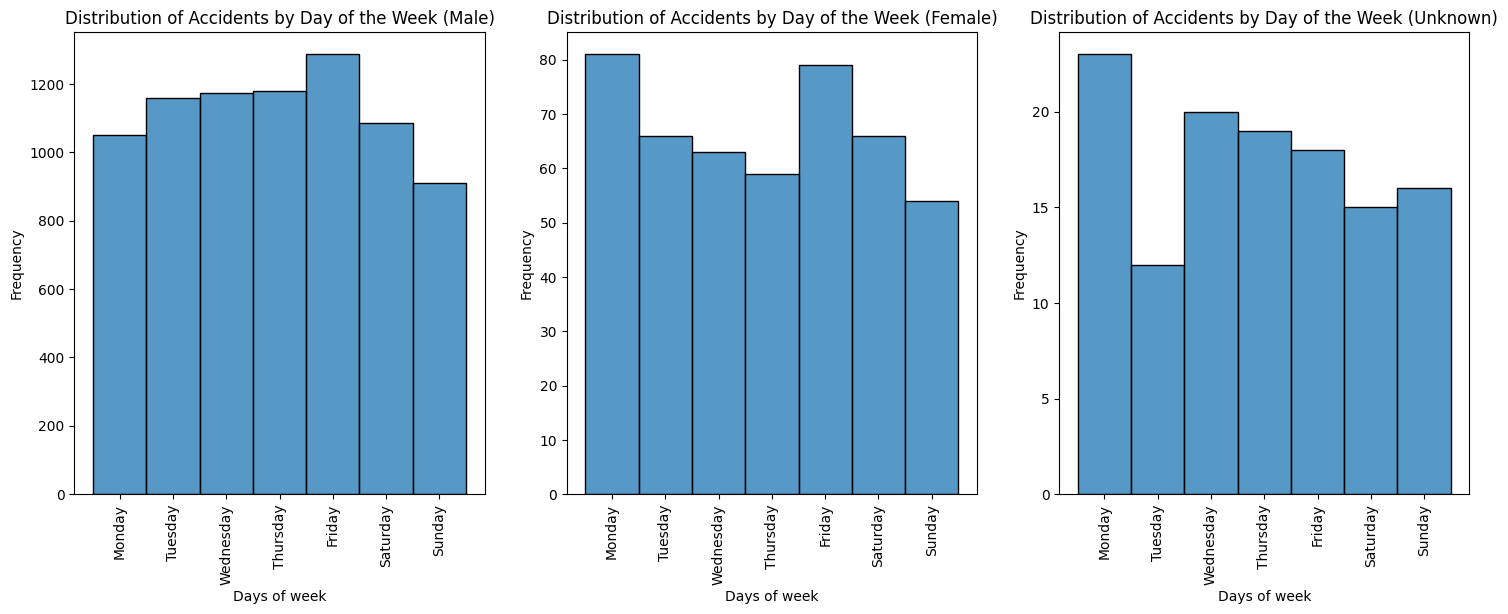

In [ ]:
# using for loop to check how accident has occur via gender
plt.figure(figsize=(18, 6))
for i,gender in enumerate(genders):
  plt.subplot(1,3,i+1)
  sns.histplot(data=df[df['Sex_of_driver']==gender],x="Day_of_week",common_norm=False)
  plt.xlabel("Days of week")
  plt.ylabel("Frequency")
  plt.title(f"Distribution of Accidents by Day of the Week ({gender})")
  plt.xticks(rotation=90)
plt.show()

Axes(0.125,0.11;0.775x0.77)


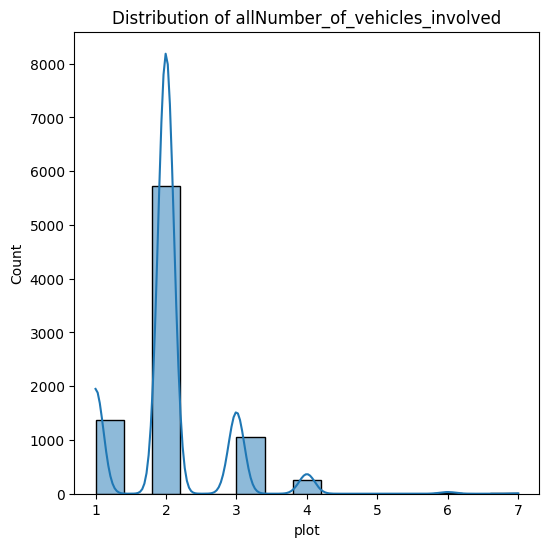

Axes(0.125,0.11;0.775x0.77)


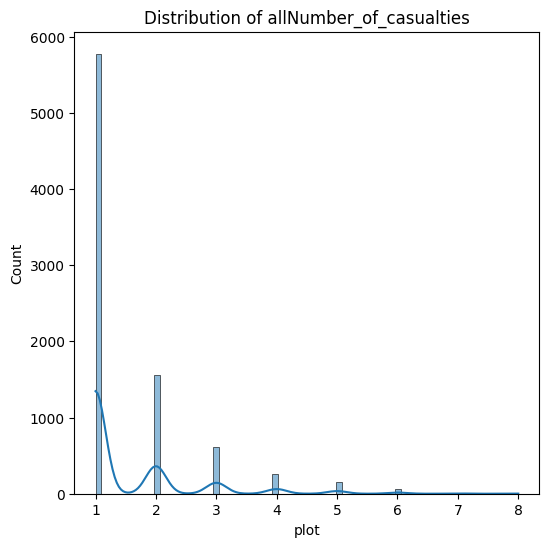

In [ ]:
# using for loop and seaborn to check the distribution of data
for i in df.select_dtypes(include="int64"):
  plt.figure(figsize=(6,6))
  hist=sns.histplot(df[i],kde=True)
  plt.title(f"Distribution of all{i}")
  plt.xlabel("plot")
  print(hist)
  plt.show()

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

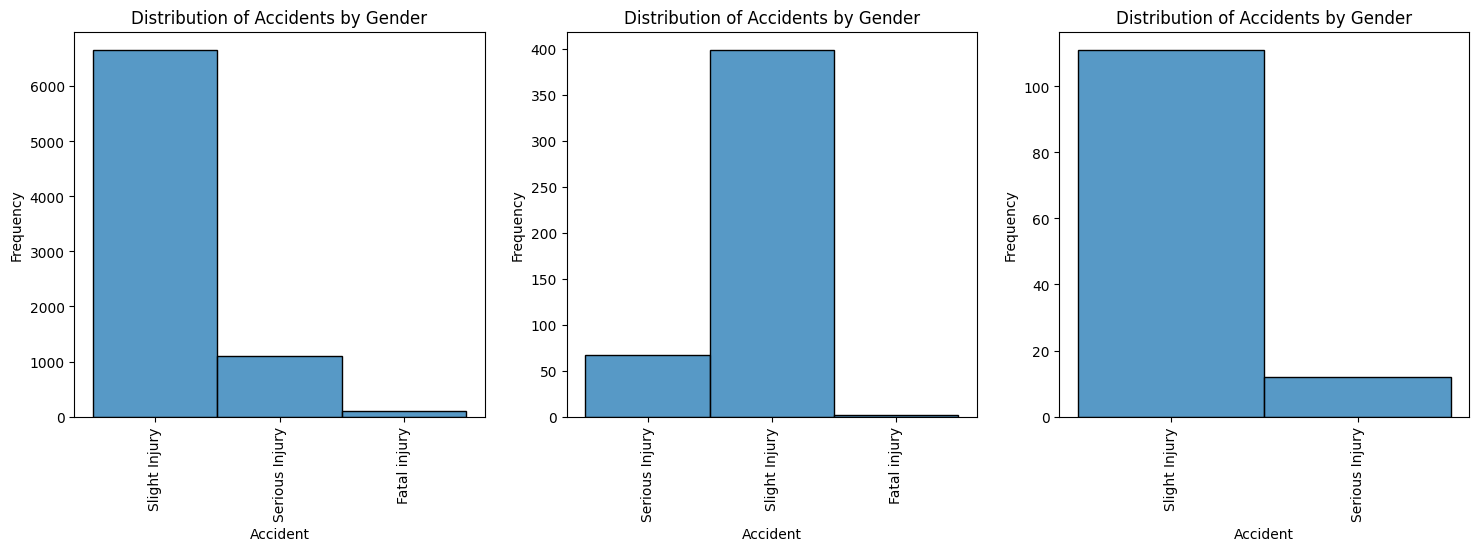

In [ ]:
# using for loop to check the distribution via gender
genders=["Male", "Female", "Unknown"]
plt.figure(figsize=(18,5))
for i,gender in enumerate(genders):
  plt.subplot(1,3,i+1)
  sns.histplot(data=df[df['Sex_of_driver']==gender],x='Accident_severity')
  plt.xlabel("Accident")
  plt.ylabel("Frequency")
  plt.title(f"Distribution of Accidents by Gender")
  plt.xticks(rotation=90)
plt.show()

In [ ]:
df.drop(columns={"Time"},inplace=True)

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


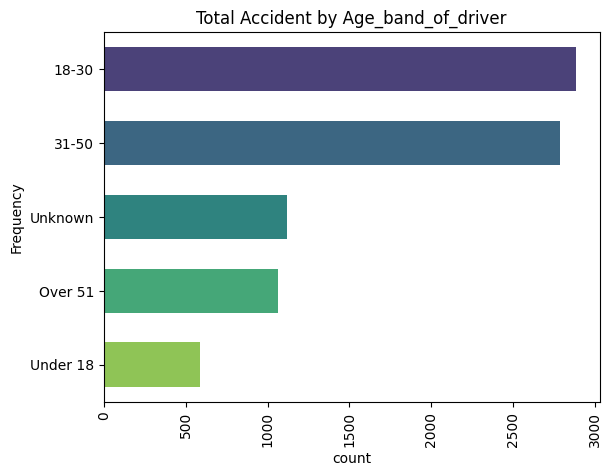

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


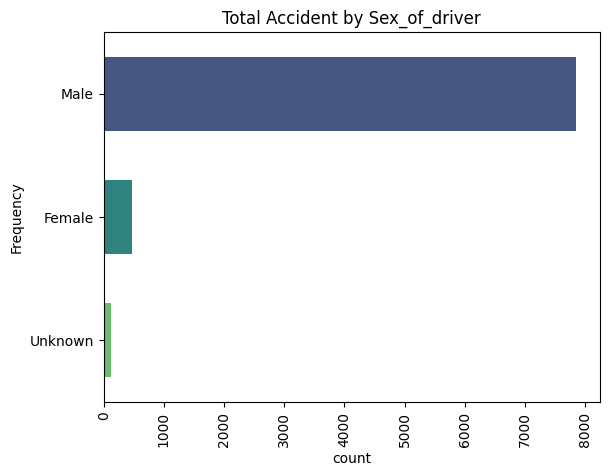

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


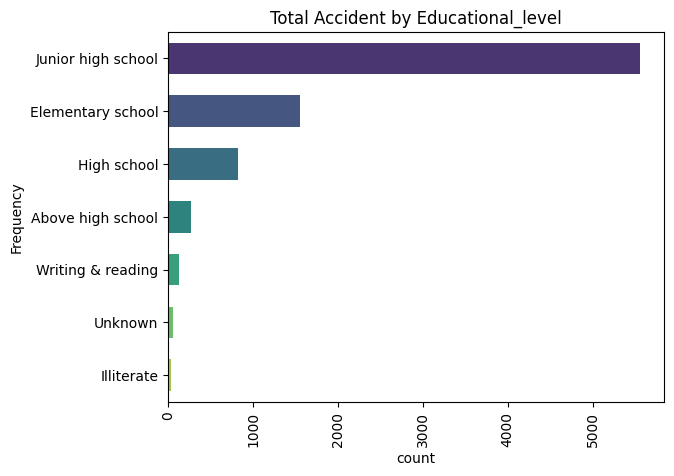

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


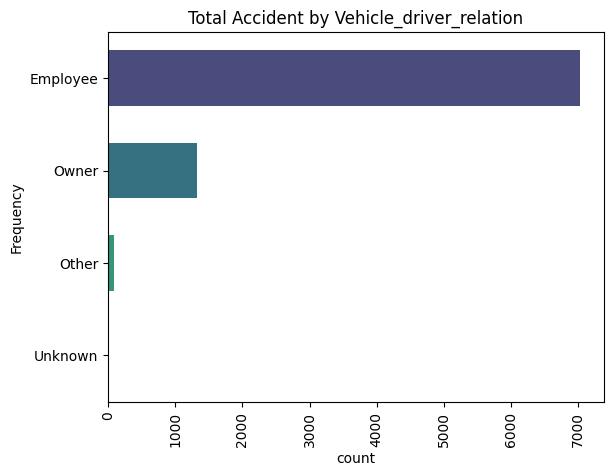

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


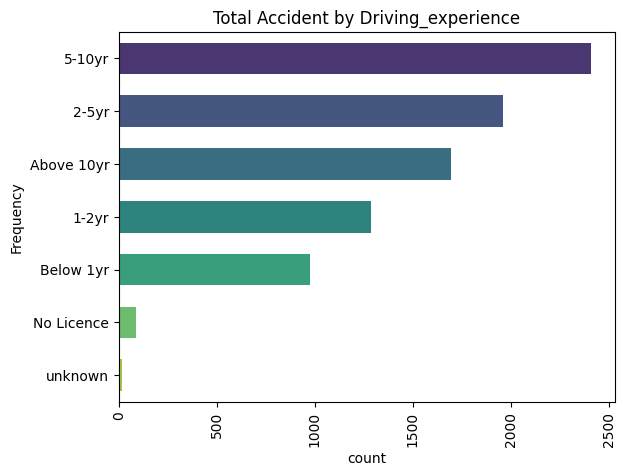

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


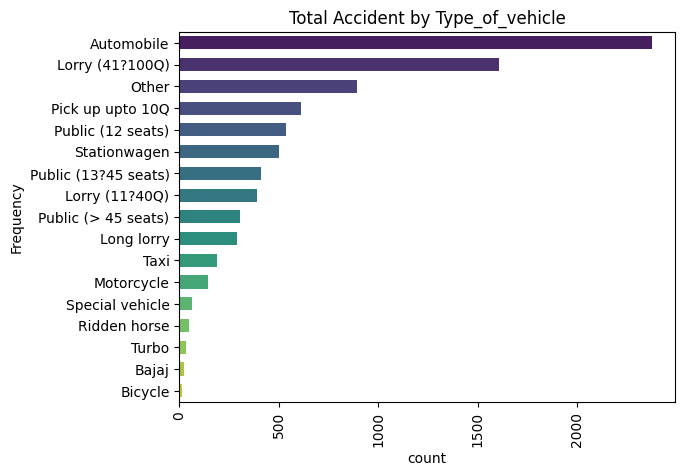

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


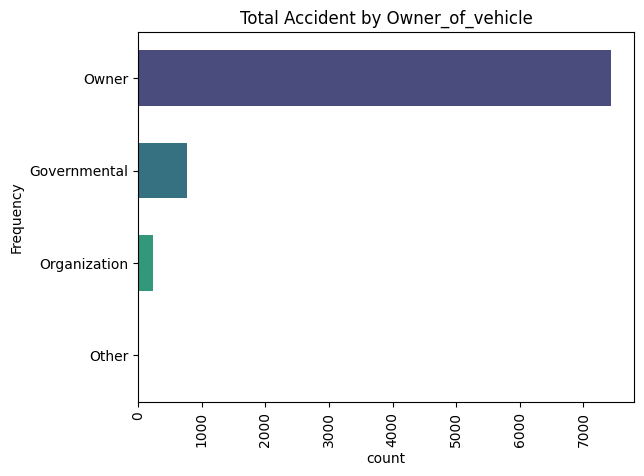

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


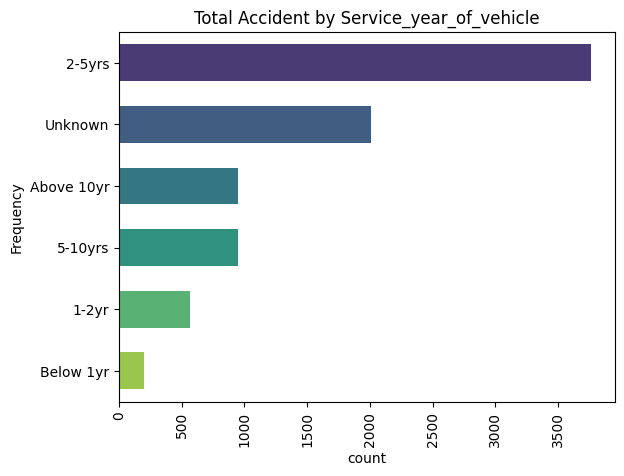

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


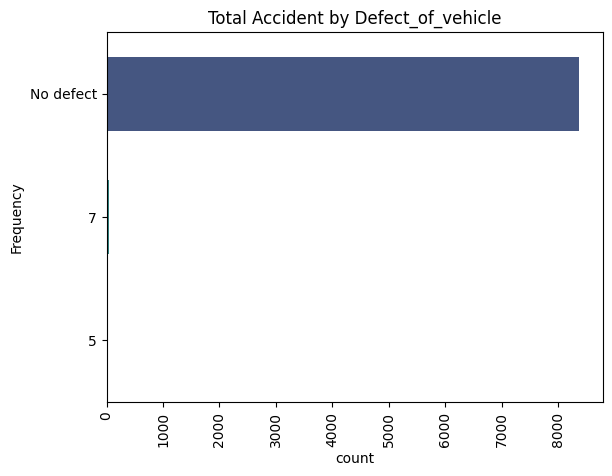

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


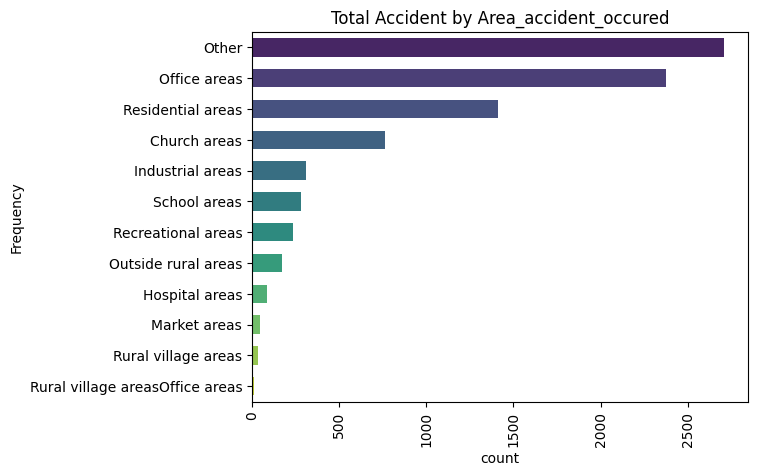

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


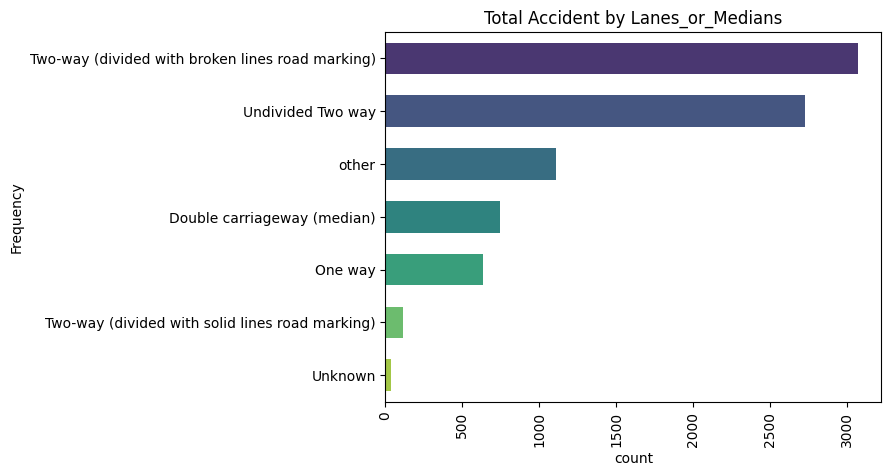

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


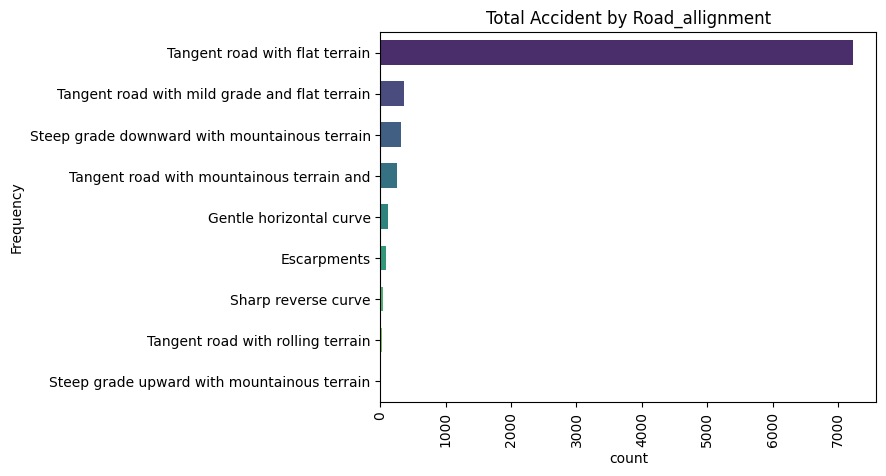

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


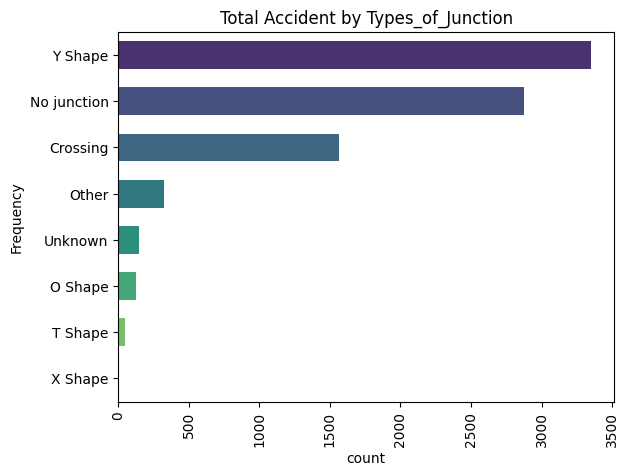

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


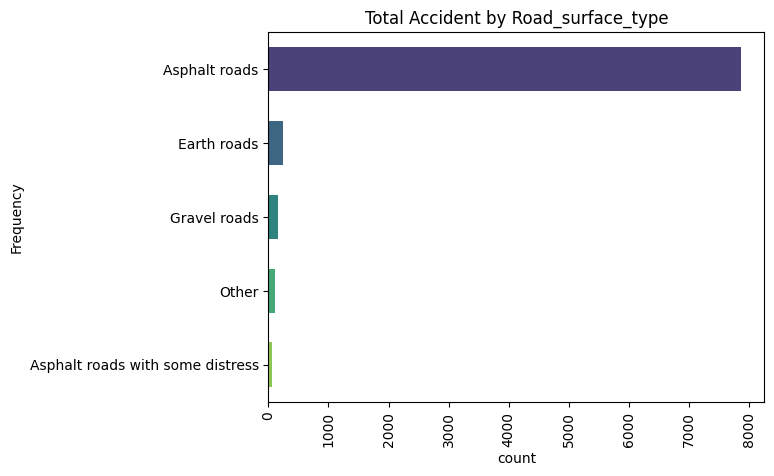

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


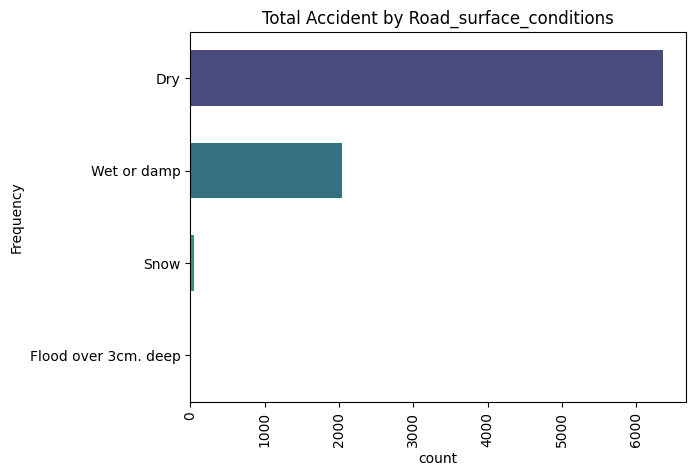

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


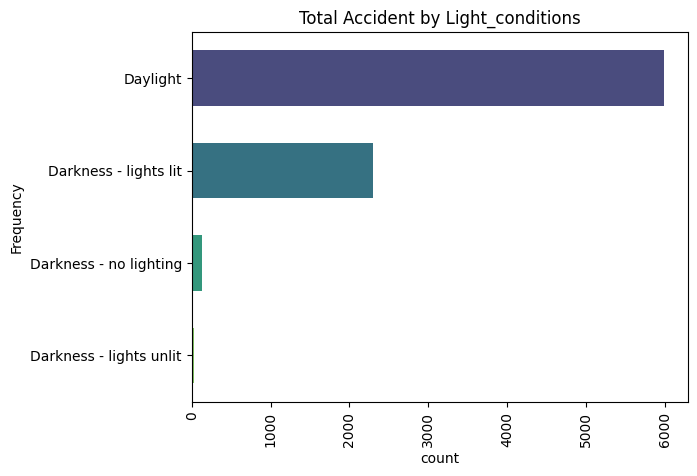

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


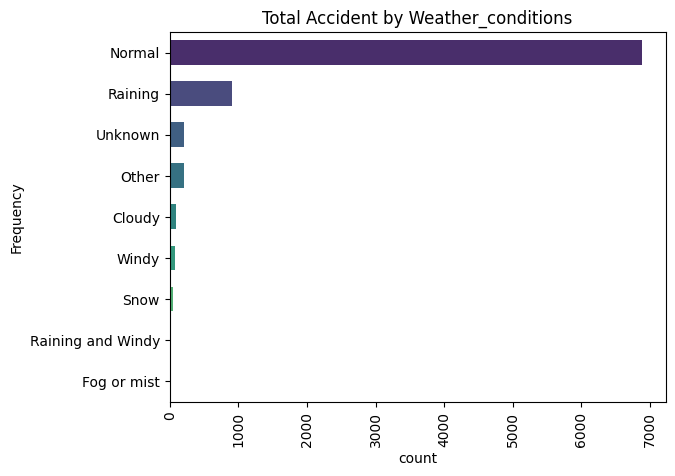

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


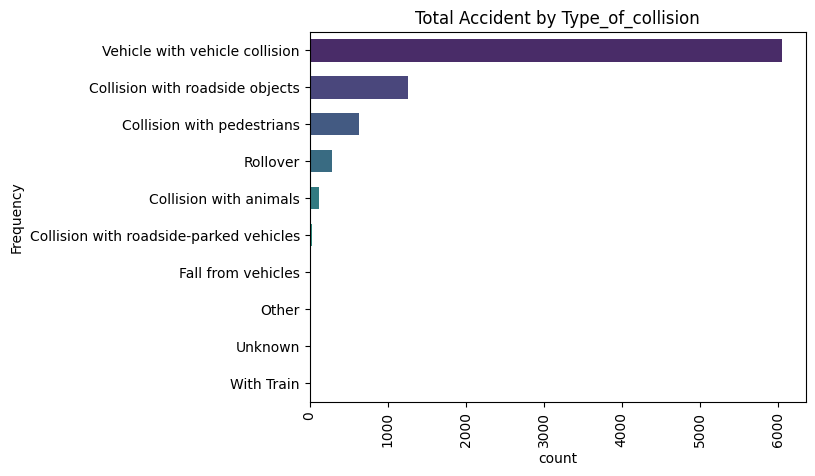

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


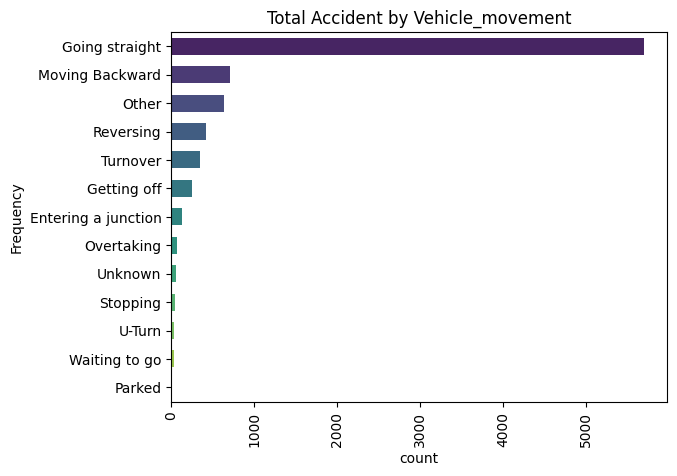

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


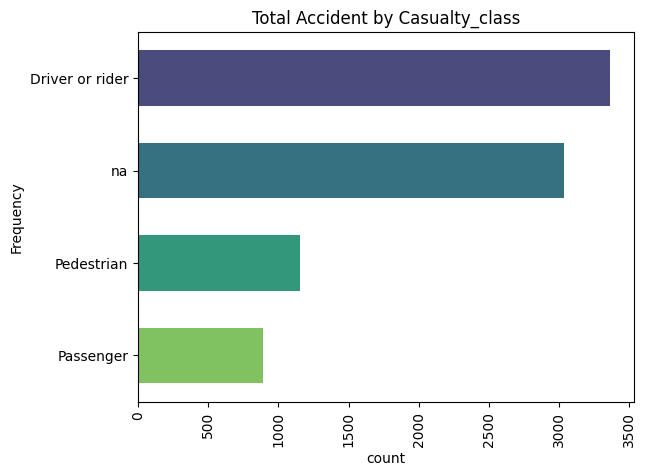

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


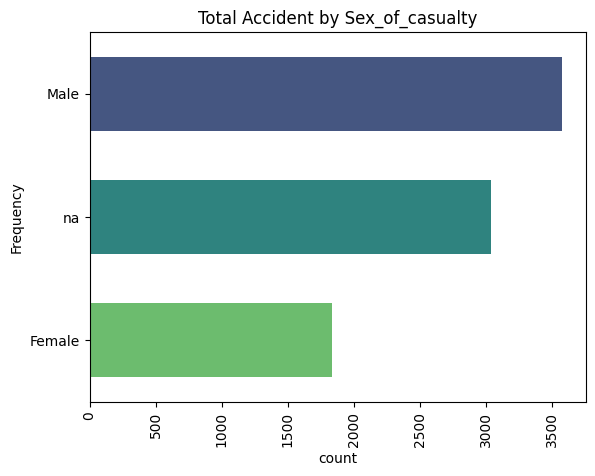

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


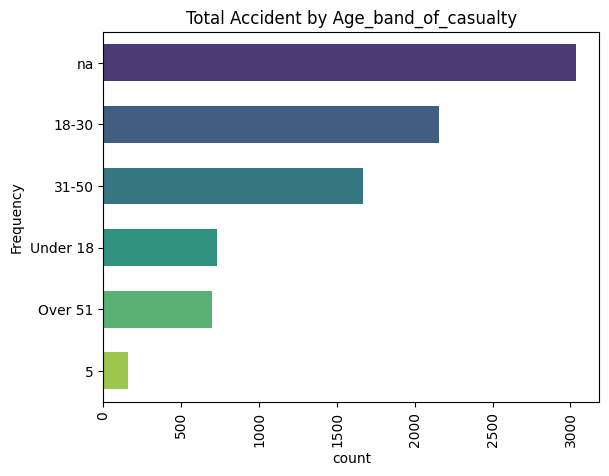

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


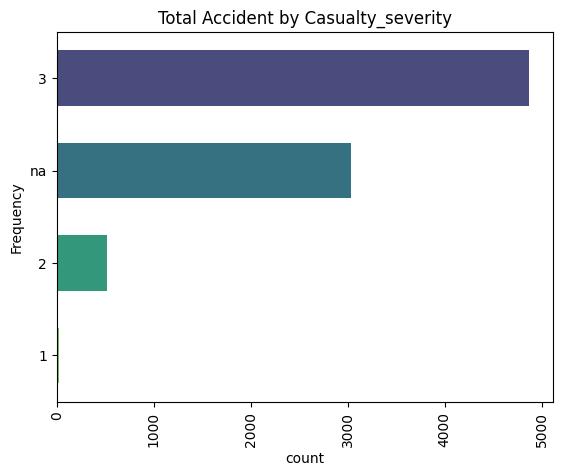

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


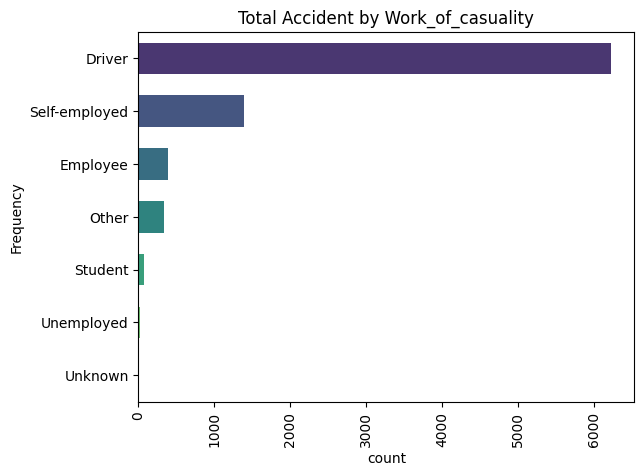

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


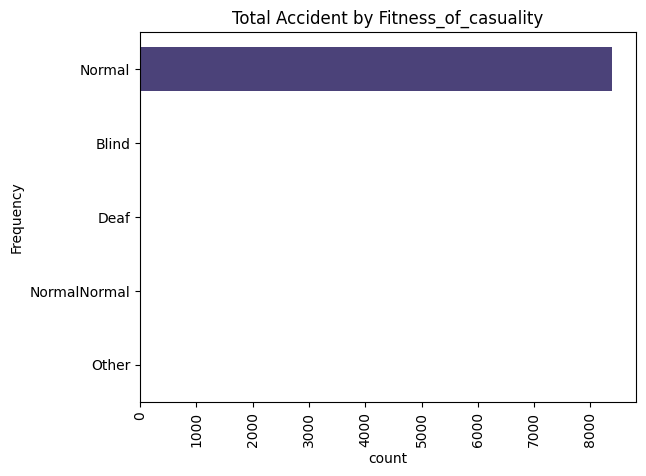

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


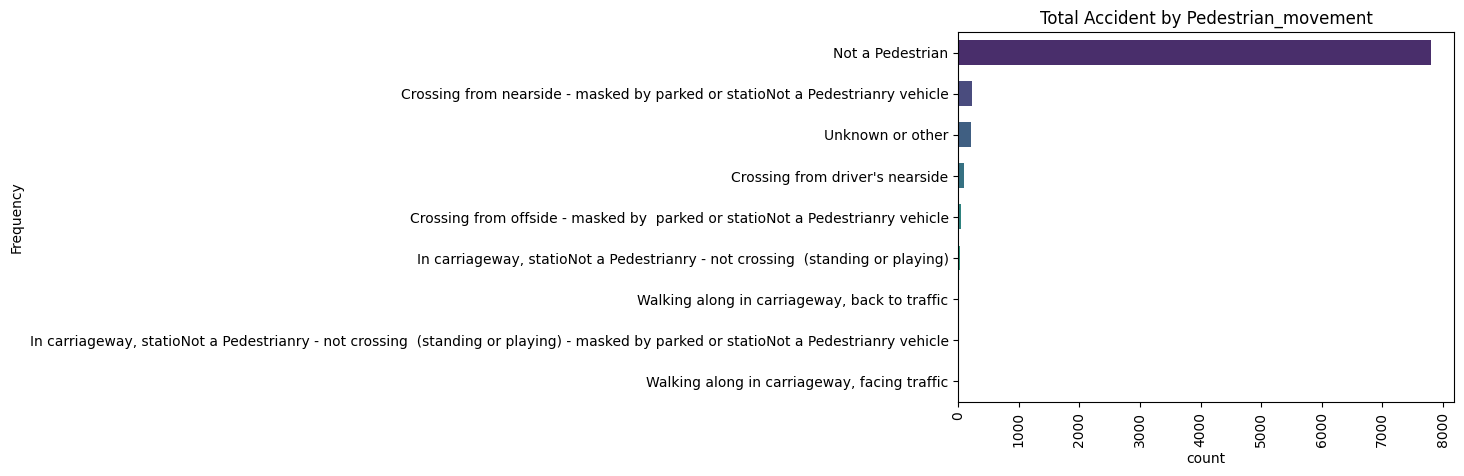

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


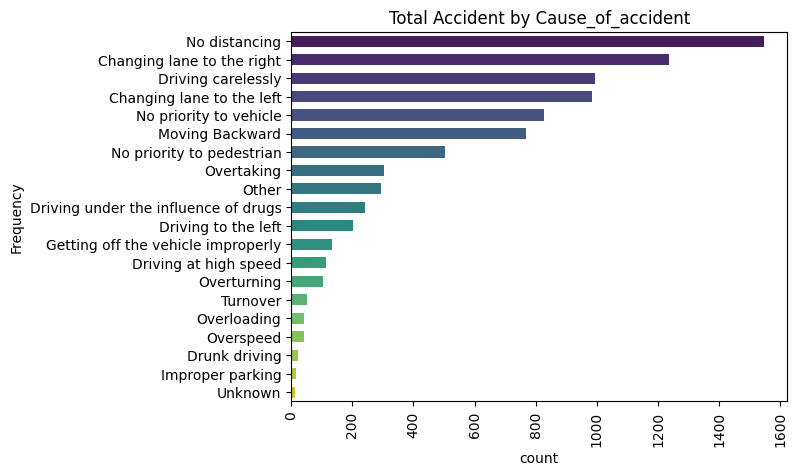

<ipython-input-41-8563119e56e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)


Axes(0.125,0.11;0.775x0.77)


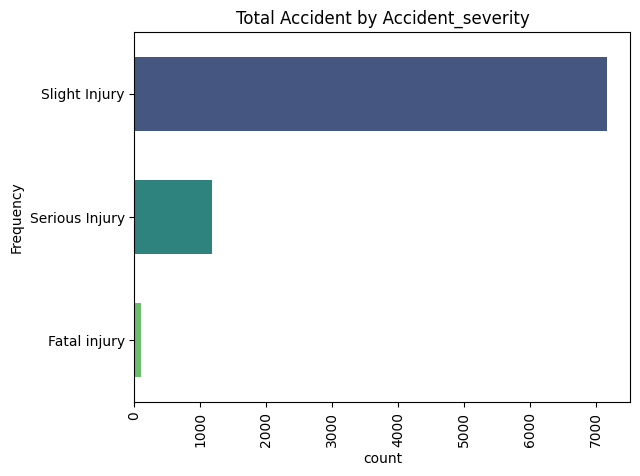

In [ ]:
# using for loop to see all data in visualization
for i in df.select_dtypes(include=object):
  count=sns.countplot(df[i],order=df[i].value_counts().index,palette='viridis',width=0.6)
  plt.title(f"Total Accident by {i}")
  plt.ylabel("Frequency")
  plt.xticks(rotation=90)
  print(count)
  plt.show()

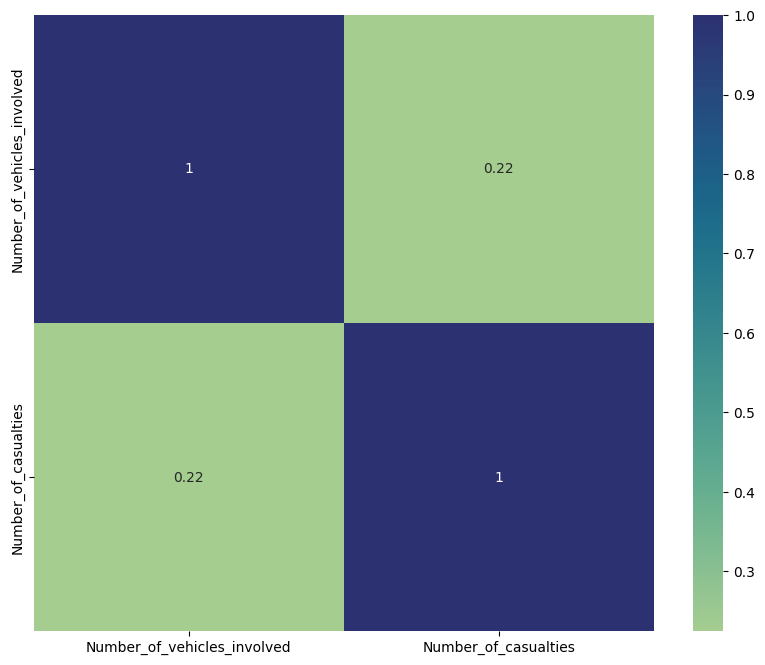

In [ ]:
# checking the co relation of dataset
df.corr=df.select_dtypes(include=['int64','float']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr,annot=True,cmap="crest")
plt.xticks()
plt.show()

In [ ]:
df_obj=df.select_dtypes(include=object)

In [ ]:
# df.head() slight injury 0, serious 1

In [ ]:
df_obj.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [ ]:
Le=LabelEncoder()

In [ ]:
# applying the label encoder
for column in df_obj:
  df[column]=Le.fit_transform(df[column])

In [ ]:
df.sample(3)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8153,Saturday,0,1,4,0,2,9,0,1,2,...,2,0,1,0,2,3,2,5,3,2
6453,Thursday,0,1,1,0,1,0,3,1,2,...,2,0,1,1,2,3,2,5,0,2
4826,Thursday,0,1,4,0,2,15,3,1,2,...,2,2,0,3,2,1,2,6,9,2


In [ ]:
df["Day_of_week"]=df[["Day_of_week"]].apply(LabelEncoder().fit_transform)

In [ ]:
df.sample(3)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4842,4,3,1,4,0,3,0,3,5,2,...,1,3,2,5,3,0,2,5,7,2
9918,4,1,1,4,0,0,11,3,2,2,...,2,3,2,5,3,0,2,5,1,2
5878,1,2,1,4,2,2,8,3,2,2,...,9,0,0,4,2,6,2,5,1,2


In [ ]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
# dropping the unnecessary columns
df.drop(columns={'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement'},inplace=True)

In [ ]:
# to drop the loan_status column from X and just including loan_status column for y
X = df.drop(['Accident_severity'], axis=1)
y = df['Accident_severity']

In [ ]:
len(X)

8439

In [ ]:
X.shape

(8439, 20)

In [ ]:
y.value_counts()

Accident_severity
2    7169
1    1171
0      99
Name: count, dtype: int64

In [ ]:
# using oversampling to balanced the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_r, y_r = smote.fit_resample(X, y)

In [ ]:
print(X_r.shape)

(21507, 20)


In [ ]:
print(y_r.shape)

(21507,)


# train test split

In [ ]:
# splitting the datatset of X and y so that we can check how much model is accurate
X_train,X_test,y_train,y_test=train_test_split(X_r,y_r,test_size=0.2,stratify=y_r,random_state=44)

print(f" Total Data of X is {X_r.shape}\n 80% for Training data {X_train.shape}\n 20% for Testing,{X_test.shape}")

 Total Data of X is (21507, 20)
 80% for Training data (17205, 20)
 20% for Testing,(4302, 20)


# Model Training

In [ ]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# giving parameters to prevent overfitting
clf=RandomForestClassifier(criterion='gini',
                           max_depth=10,
                           min_samples_split=8,
                           random_state=6)

In [ ]:
# Training of dataset with the help of Random Forest
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=8, random_state=6)

In [ ]:
# it shows how much impotance your columns is with the help of gini index
clf.feature_importances_*100

array([10.13617112,  8.53739071,  1.17278291,  5.05361707,  3.33057953,
        8.67839443,  5.86976765,  1.77647078,  4.01816433,  0.14108076,
        5.86142251,  4.31265951,  1.6429179 ,  4.38207559,  0.80900425,
        6.34628827, 13.74389635,  2.63035464,  5.51362518,  6.04333651])

In [ ]:
y_pred_clf=clf.predict(X_test)

In [ ]:
# Predictio of Random Forest
y_pred_clf

array([1, 0, 2, ..., 2, 0, 2])

In [ ]:
# Accuracy Score of Random Foests
accuracy_clf=accuracy_score(y_pred_clf,y_test)

In [ ]:
print("Accuracy score of Random Forest is: ",accuracy_clf*100)

Accuracy score of Random Forest is:  80.0325430032543


In [ ]:
cm=confusion_matrix(y_test,y_pred_clf)

In [ ]:
cm

array([[1368,   50,   16],
       [ 179,  981,  274],
       [  72,  268, 1094]])

Text(50.722222222222214, 0.5, 'True Value')

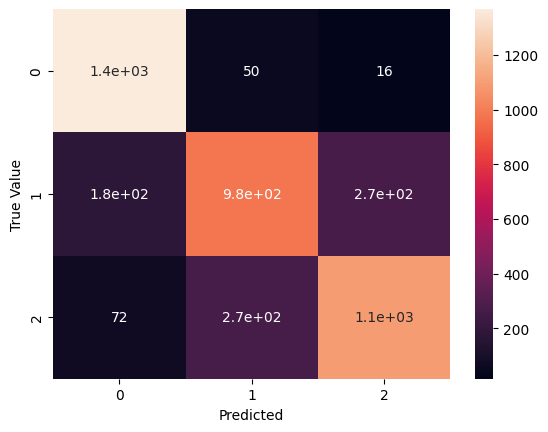

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [ ]:
Report_clf=classification_report(y_test,y_pred_clf)
print(Report_clf)

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1434
           1       0.76      0.68      0.72      1434
           2       0.79      0.76      0.78      1434

    accuracy                           0.80      4302
   macro avg       0.80      0.80      0.80      4302
weighted avg       0.80      0.80      0.80      4302



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
naivebayes=GaussianNB()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Naive Bayes Algorithm
naivebayes.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred_nb=naivebayes.predict(X_test_scaled)

In [ ]:
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

20273    1
10651    0
3335     2
11379    0
21480    1
        ..
4870     2
13493    0
8161     2
13734    0
15949    1
Name: Accident_severity, Length: 4302, dtype: int64

In [ ]:
accuracy_score_nb=accuracy_score(y_pred_nb,y_test)

In [ ]:
print("Accuracy Score of Naive bayes Algorithm" ,accuracy_score_nb*100)

Accuracy Score of Naive bayes Algorithm 38.98186889818689


In [ ]:
cm_nb=confusion_matrix(y_test,y_pred_nb)

In [ ]:
cm

array([[1368,   50,   16],
       [ 179,  981,  274],
       [  72,  268, 1094]])

<Axes: >

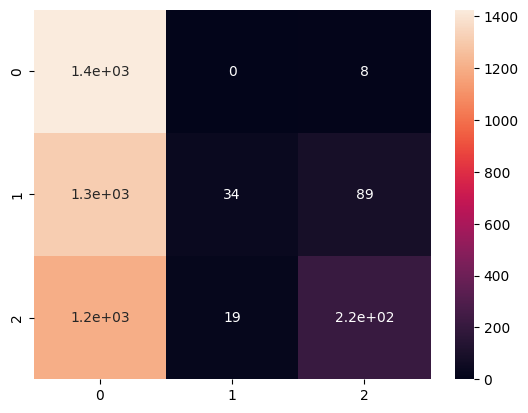

In [ ]:
sns.heatmap(cm_nb,annot=True)

In [ ]:
Report_nb=classification_report(y_test,y_pred_nb)
print(Report_nb)

              precision    recall  f1-score   support

           0       0.36      0.99      0.53      1434
           1       0.64      0.02      0.05      1434
           2       0.69      0.15      0.25      1434

    accuracy                           0.39      4302
   macro avg       0.56      0.39      0.28      4302
weighted avg       0.56      0.39      0.28      4302



In [ ]:
# using hyperparameter to prevent overfitting
params_grid={'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'loss': ['log_loss', 'exponential'],
    'max_features': [None, 'sqrt', 'log2', 0.5]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# using gardient boosting algorithm
gdc=GradientBoostingClassifier(learning_rate=0.1,loss='log_loss',max_depth=5,
                               max_features='sqrt',
                               min_samples_leaf=4,min_samples_split=5,
                               n_estimators=100,subsample=1.0)

In [ ]:
grid_search=GridSearchCV(estimator=gdc,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [ ]:
# traiing the dataset
gdc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=5)

In [ ]:
y_pred_gdc=gdc.predict(X_test)

In [ ]:
y_pred_gdc

array([1, 0, 2, ..., 2, 0, 2])

In [ ]:
y_test

20273    1
10651    0
3335     2
11379    0
21480    1
        ..
4870     2
13493    0
8161     2
13734    0
15949    1
Name: Accident_severity, Length: 4302, dtype: int64

In [ ]:
accuracy_score_gdc=accuracy_score(y_test,y_pred_gdc)

In [ ]:
print("Accuracy score of Gradient Boosting Algorithm: "
,accuracy_score_gdc*100)

Accuracy score of Gradient Boosting Algorithm:  82.72896327289632


In [ ]:
cm_gdc=confusion_matrix(y_test,y_pred_gdc)

<Axes: >

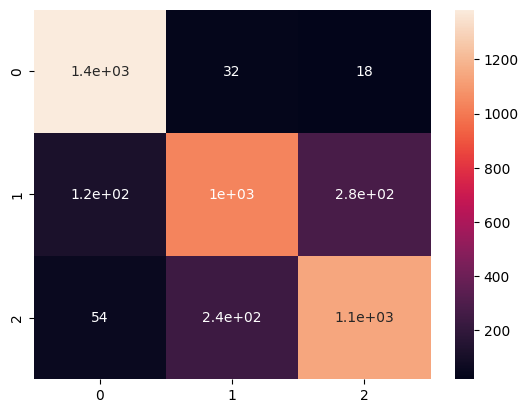

In [ ]:
sns.heatmap(cm_gdc,annot=True)

In [ ]:
Report_gdc=classification_report(y_test,y_pred_gdc)
print(Report_gdc)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1434
           1       0.79      0.72      0.76      1434
           2       0.79      0.79      0.79      1434

    accuracy                           0.83      4302
   macro avg       0.82      0.83      0.82      4302
weighted avg       0.82      0.83      0.82      4302



In [ ]:
# Knn algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
y_pred_knn

array([1, 0, 2, ..., 1, 0, 1])

In [ ]:
y_test

20273    1
10651    0
3335     2
11379    0
21480    1
        ..
4870     2
13493    0
8161     2
13734    0
15949    1
Name: Accident_severity, Length: 4302, dtype: int64

In [ ]:
accuracy_score_knn=accuracy_score(y_test,y_pred_knn)

In [ ]:
print("Knn Algorithm Score: ",accuracy_score_knn*100)

Knn Algorithm Score:  81.79916317991632


In [ ]:
cm_knn=confusion_matrix(y_test,y_pred_knn)

In [ ]:
cm_knn

array([[1434,    0,    0],
       [   9, 1401,   24],
       [ 173,  577,  684]])

<Axes: >

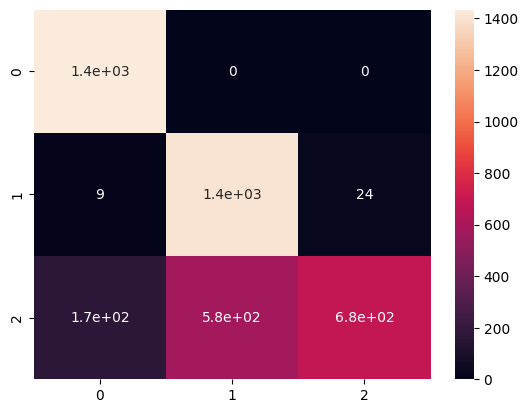

In [ ]:
sns.heatmap(cm_knn,annot=True)

In [ ]:
Report_knn=classification_report(y_test,y_pred_knn)

In [ ]:
print(Report_knn)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1434
           1       0.71      0.98      0.82      1434
           2       0.97      0.48      0.64      1434

    accuracy                           0.82      4302
   macro avg       0.85      0.82      0.80      4302
weighted avg       0.85      0.82      0.80      4302



# Results and Conclusion

In [ ]:
# Random Forest has got the highest accuracy score compare to Knn and Gradient boosting
final_Report=pd.DataFrame({'Models':["Random Forest","Gradient Boosting Algorithm","Knn Classifier","Naive Bayes"],
                         "accuracy_score":[accuracy_clf*100,accuracy_score_gdc*100,accuracy_score_knn*100,accuracy_score_nb*100],
                         })

final_Report

,Models,accuracy_score
0,Random Forest,80.032543
1,Gradient Boosting Algorithm,82.728963
2,Knn Classifier,81.799163
3,Naive Bayes,38.981869
